# Multiclass classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create a Multiclass classification dataset

In [2]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=6000, n_features=30, n_informative=15, n_classes=3, random_state=42)

In [3]:
X

array([[-1.44143883,  0.99759432,  0.64881894, ...,  0.26075709,
        -2.4917032 , -0.52457062],
       [-5.14274116,  2.44379509,  0.59681357, ..., -0.67343933,
         2.13880873, -1.34828698],
       [ 0.65562953, -1.84153079,  0.80405201, ..., -1.45272723,
        -3.46992694,  1.12992925],
       ...,
       [ 4.12653393, -4.34701772, -0.2590811 , ..., -0.28741425,
         7.28922344, -1.18100918],
       [-0.71009863,  3.94052935,  1.83897001, ...,  3.29290311,
         6.91505595,  0.80226731],
       [ 1.24909105,  3.92319056, -0.05696048, ..., -2.61261051,
        -3.21501144, -0.04845804]])

In [4]:
Y

array([2, 2, 0, ..., 1, 0, 2])

In [5]:
import numpy as np
np.unique(Y)

array([0, 1, 2])

### Create dataframe for X and Y

In [6]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [7]:
import pandas as pd
X = pd.DataFrame(X, columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.441439,0.997594,0.648819,-0.939605,1.757397,0.578914,2.427303,-2.051151,2.229941,4.161986,...,-1.479880,-0.348015,-0.607153,-1.081817,-1.993413,1.533084,-1.496706,0.260757,-2.491703,-0.524571
1,-5.142741,2.443795,0.596814,-5.863056,1.387833,0.481951,4.083274,-0.973058,0.552966,2.620579,...,-0.743816,-0.382961,-0.274725,-0.832032,-1.148192,-0.926654,0.970663,-0.673439,2.138809,-1.348287
2,0.655630,-1.841531,0.804052,2.357834,-4.326275,-0.973050,-4.126278,-6.036214,-3.200378,1.758776,...,0.240042,-1.137683,-0.927894,0.697630,0.631764,0.240156,0.139782,-1.452727,-3.469927,1.129929
3,-1.598327,1.024581,0.237928,1.391549,-0.488321,-1.089719,-3.627360,0.757025,-0.750550,1.952786,...,1.769143,0.310551,1.196544,1.108069,0.824942,0.480005,1.255185,-1.671230,3.642342,-1.862065
4,-1.079465,-0.613138,-2.654921,1.533515,1.009928,-0.910633,-0.973801,-1.726216,-2.431381,1.305569,...,0.724812,1.708111,-0.302242,0.858970,0.878317,-0.369408,0.278626,-2.291166,-0.044003,0.627598


In [8]:
Y = pd.DataFrame(Y, columns=['Y'])
Y

,Y
0,2
1,2
2,0
3,0
4,0
...,...
5995,2
5996,1
5997,1
5998,0


In [9]:
Y.value_counts()

Y
1    2004
2    2000
0    1996
Name: count, dtype: int64

### Preprocessing for Y

In [10]:
from keras.utils import to_categorical
Y_cat = to_categorical(Y)

In [11]:
Y_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Create a preprocessing pipeline for X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-0.52671961,  0.27230193,  0.65623137, ...,  0.23135323,
        -0.25895458, -0.52958856],
       [-1.93121764,  0.87478938,  0.6049309 , ..., -0.14098636,
         0.73357158, -1.35982943],
       [ 0.269035  , -0.91047798,  0.80936035, ..., -0.45158456,
        -0.46863176,  1.13801631],
       ...,
       [ 1.58610611, -1.95426419, -0.23936264, ...,  0.01287038,
         1.8375362 , -1.19122665],
       [-0.2492049 ,  1.49832908,  1.83025067, ...,  1.43986566,
         1.75733535,  0.80775901],
       [ 0.4942302 ,  1.49110574, -0.03998164, ..., -0.91387541,
        -0.41399194, -0.04970478]])

In [15]:
cols = num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.526720,0.272302,0.656231,-0.225921,0.751405,0.574286,1.249114,-0.570934,0.927751,1.673181,...,-1.489109,-0.340353,-0.625233,-1.075979,-0.827133,1.529565,-1.530454,0.231353,-0.258955,-0.529589
1,-1.931218,0.874789,0.604931,-2.081035,0.592913,0.476724,2.000062,-0.120260,0.223806,0.998535,...,-0.752340,-0.375454,-0.294869,-0.826403,-0.483039,-0.934985,0.957838,-0.140986,0.733572,-1.359829
2,0.269035,-0.910478,0.809360,1.016526,-1.857657,-0.987252,-1.722796,-2.236805,-1.351737,0.621340,...,0.232462,-1.133510,-0.943983,0.701980,0.241593,0.234107,0.119910,-0.451585,-0.468632,1.138016
3,-0.586253,0.283545,0.250910,0.652438,-0.211700,-1.104641,-1.496547,0.602964,-0.323371,0.706255,...,1.763030,0.321121,1.167266,1.112076,0.320237,0.474425,1.244772,-0.538672,1.055846,-1.877677
4,-0.389365,-0.398729,-2.602729,0.705930,0.430843,-0.924450,-0.293215,-0.435102,-1.028935,0.422980,...,0.717698,1.724856,-0.322215,0.863185,0.341966,-0.376649,0.259932,-0.785758,0.265697,0.631707


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_cat, test_size=0.2, random_state=42)

In [18]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
3897,-0.543571,-0.019042,0.045309,-0.580487,0.152804,0.893800,0.457580,0.162031,0.012832,-1.475231,...,1.748269,-0.323666,-1.498440,-0.801106,-0.019642,0.594704,0.302236,0.513468,-0.285997,0.303386
5628,1.011186,-0.020967,-1.607443,-2.033375,0.045647,-0.149993,0.266554,0.243799,-0.008622,1.253602,...,-0.809695,-1.039981,0.965447,-0.832631,-2.027918,-0.157857,0.679601,-0.088923,-0.944892,-0.699163
1756,-1.697553,-0.875006,-0.394224,-1.912509,0.167416,-0.617574,0.588293,0.809653,1.569820,0.648541,...,1.052694,1.478953,2.051413,0.138883,-0.957434,0.526127,-0.019683,-0.842406,-0.879651,-0.759638
2346,-0.695023,-1.402155,1.975044,0.467674,-0.199899,-1.841401,-0.883977,-0.010609,-0.403109,-0.744025,...,-0.640925,1.804151,-0.465239,-1.137112,0.155095,-0.143831,0.758476,-0.075998,-1.059547,-0.109672
2996,0.690033,-0.477324,1.024073,1.154438,0.391757,-0.042410,1.986831,1.671135,1.869289,-0.692286,...,1.615828,-0.709746,-0.478441,1.359778,0.281754,-1.950171,-0.372190,0.497917,1.159817,0.812185


In [19]:
ytrain[0:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [20]:
ytrain.shape

(4800, 3)

In [21]:
ytrain.shape[1]

3

In [22]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1782,-1.541585,-0.621096,1.446116,0.526833,0.092480,-0.872741,0.763647,-0.005977,0.803367,-1.141591,...,0.455955,-1.193269,-1.074553,0.600377,0.909267,-0.736203,-0.555873,-0.802501,0.419976,0.590310
3917,0.195244,-0.789687,-2.082877,0.086383,0.500841,-0.817277,0.081145,0.734700,0.783167,0.804133,...,-0.758443,0.380874,0.542159,-0.324582,-0.505033,-0.188219,-0.230193,-0.030395,-0.044454,-0.496936
221,1.194991,-0.064019,0.585004,1.023460,0.796115,-0.058792,0.621334,1.283837,0.847144,0.590837,...,-0.117730,2.156139,-0.052305,0.966632,-0.532152,0.421381,0.331739,-2.059234,-0.222865,0.206466
2135,0.346122,-0.267713,-0.046916,-0.878599,0.394272,-1.503213,0.633133,0.949152,-0.097784,1.383897,...,0.312512,-0.631066,-0.183804,-0.157119,0.659853,0.047864,-0.633288,0.607493,0.463069,-1.438327
5224,0.736885,0.647841,-0.495896,0.317570,-0.551170,1.034425,0.252213,-0.464908,-0.701343,-0.305647,...,0.777272,0.567679,0.607205,-1.105710,0.868539,-2.016291,-0.972826,0.877120,0.616826,1.055217


In [23]:
ytest[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [24]:
xtrain.shape

(4800, 30)

In [25]:
xtest.shape

(1200, 30)

### Start building keras model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [27]:
xtrain.shape[1]

30

In [28]:
model = Sequential()

# Hidden Layer 1 with input dims
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
# Dropout Layer 1
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
# Dropout Layer 2
model.add(Dropout(0.2))

# Output Layer contains number of classes as output
model.add(Dense(3, activation='softmax'))

### Compile function

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

### Callback

In [30]:
callback = EarlyStopping(monitor='val_loss', patience=10)

### Fitting model

In [31]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=200, callbacks=[callback])

Epoch 1/200
120/120 [==============================] - 5s 9ms/step - loss: 1.0283 - accuracy: 0.4654 - auc: 0.6675 - val_loss: 0.7961 - val_accuracy: 0.6656 - val_auc: 0.8469
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 0.8317 - accuracy: 0.6216 - auc: 0.8051 - val_loss: 0.6733 - val_accuracy: 0.7323 - val_auc: 0.8911
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 0.7226 - accuracy: 0.6789 - auc: 0.8568 - val_loss: 0.5825 - val_accuracy: 0.7708 - val_auc: 0.9192
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 0.6724 - accuracy: 0.7122 - auc: 0.8776 - val_loss: 0.5179 - val_accuracy: 0.7979 - val_auc: 0.9357
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 0.6212 - accuracy: 0.7388 - auc: 0.8958 - val_loss: 0.4699 - val_accuracy: 0.8333 - val_auc: 0.9476
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7721 - auc: 0.9164 - val_loss

### Visulize learning curve

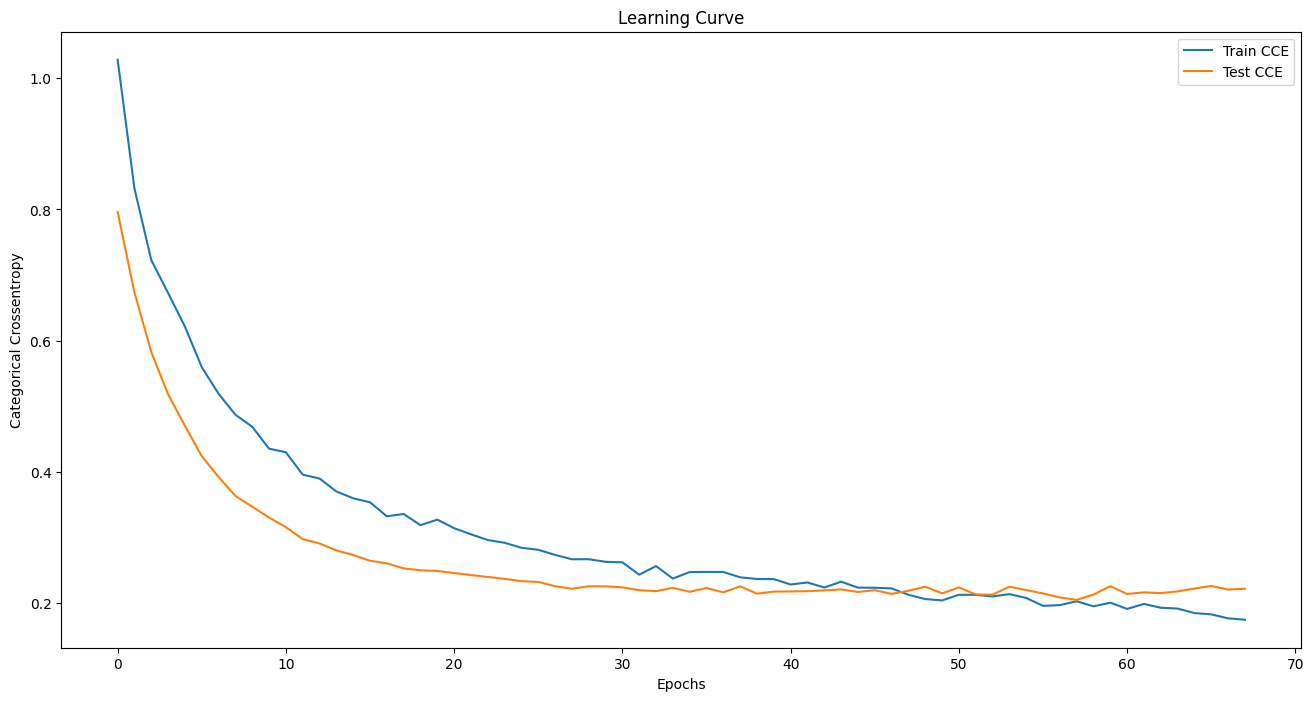

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train CCE')
plt.plot(hist.history['val_loss'], label='Test CCE')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [33]:
model.evaluate(xtrain, ytrain)

150/150 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9719 - auc: 0.9954


[0.10865681618452072, 0.971875011920929, 0.9954397678375244]

In [34]:
model.evaluate(xtest, ytest)

38/38 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9275 - auc: 0.9861


[0.22810226678848267, 0.9275000095367432, 0.9861290454864502]

### Predicting the results

In [35]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

38/38 [==============================] - 0s 3ms/step


In [36]:
yprob_tr

array([[2.34438200e-03, 9.96163726e-01, 1.49189821e-03],
       [1.17476525e-07, 7.70091617e-07, 9.99999166e-01],
       [7.59392381e-01, 9.30124372e-07, 2.40606755e-01],
       ...,
       [2.35679613e-06, 9.39813617e-04, 9.99057829e-01],
       [9.98435915e-01, 4.06988220e-05, 1.52336748e-03],
       [9.88891661e-01, 9.11291522e-08, 1.11082429e-02]], dtype=float32)

In [37]:
yprob_ts

array([[9.30124342e-01, 6.90608621e-02, 8.14819301e-04],
       [3.58696967e-01, 2.14163773e-02, 6.19886637e-01],
       [7.44871736e-01, 3.58272740e-03, 2.51545519e-01],
       ...,
       [1.62953101e-02, 1.17271885e-01, 8.66432786e-01],
       [7.24071741e-01, 2.74673760e-01, 1.25442469e-03],
       [9.77056563e-01, 2.09216904e-02, 2.02178466e-03]], dtype=float32)

In [38]:
yprob_ts[0]

array([9.3012434e-01, 6.9060862e-02, 8.1481930e-04], dtype=float32)

### Predictions for the values

In [39]:
ypred_tr = np.argmax(yprob_tr, axis=-1)
ypred_tr

array([1, 2, 0, ..., 2, 0, 0], dtype=int64)

In [40]:
ypred_ts = np.argmax(yprob_ts, axis=-1)
ypred_ts

array([0, 2, 0, ..., 2, 0, 0], dtype=int64)

### Getting orignal classes

In [41]:
ytest

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [42]:
ytest_act = np.argmax(ytest, axis=-1)
ytrain_act = np.argmax(ytrain, axis=-1)

In [43]:
ytest_act

array([0, 2, 2, ..., 2, 0, 0], dtype=int64)

### Create a confusion matrix for test results

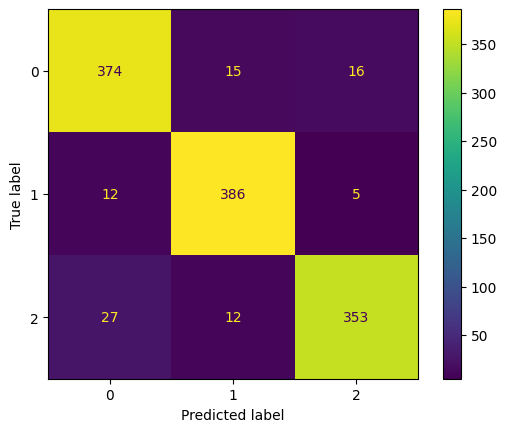

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest_act, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest_act, ypred_ts))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       405
           1       0.93      0.96      0.95       403
           2       0.94      0.90      0.92       392

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



### Save the model for future use

In [46]:
model.save('MulticlassModel.keras')

### Loading the model

In [47]:
from keras.models import load_model
nn = load_model('MulticlassModel.keras')

In [48]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4163 (16.26 KB)
Trainable params: 4163 (16.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
